# Drawing the multipanel barplot for WBGT: all AR6 land regions

In [1]:
ensembles = c('CMIP5', 'CMIP6')
GWLs = c('1.5','2','4')
scenarios = c('modern', '2.6_mid', '8.5_mid', '2.6_late', '8.5_late')

data = list()
for (ensemble in ensembles){
    data[[ensemble]] = list()
    for (GWL in GWLs){
        data[[ensemble]][[GWL]] = list()
    }
    for (scenario in scenarios){
        data[[ensemble]][[scenario]] = list()
    }

}

## 1. Get the data from the json files

In [2]:
library(rjson)

Warning message:
“package ‘rjson’ was built under R version 3.6.3”


In [17]:
# -- CMIP6
ensemble = 'CMIP6'
json_file = paste('/home/jservon/Chapter12_IPCC/data/wind_satellites/',ensemble,'_sfcWind_AR6_regional_averages.json',sep='')

#quantiles_dict[clim_period][region_name] = [q10, q50, q90]
#
json_data <- fromJSON(paste(readLines(json_file), collapse=""))
AR6_regions = names(json_data[['1.5']])

Warning message in readLines(json_file):
“ligne finale incomplète trouvée dans '/home/jservon/Chapter12_IPCC/data/wind_satellites/CMIP6_sfcWind_AR6_regional_averages.json'”


In [4]:
AR6_regions

[1] "ARP"  "CAF"  "CAR"  "CAU"  "CNA"  "EAN"  "EAS"  "EAU"  "ECA"  "EEU" 
[11] "ENA"  "ESAF" "ESB"  "GIC"  "MDG"  "MED"  "NAU"  "NCA"  "NEAF" "NEN" 
[21] "NES"  "NEU"  "NSA"  "NWN"  "NWS"  "NZ"   "RAR"  "RFE"  "SAH"  "SAM" 
[31] "SAS"  "SAU"  "SCA"  "SEA"  "SEAF" "SES"  "SSA"  "SWS"  "TIB"  "WAF" 
[41] "WAN"  "WCA"  "WCE"  "WNA"  "WSAF" "WSB"

### Prepare R list with all the regions => Get the regions list from the CMIP6 json file, for GWL 1.5K

In [5]:
all_regions = list()
GWLs = c('1.5','2','4')
scenarios = c('modern', '2.6_mid', '8.5_mid', '2.6_late', '8.5_late')

for (region_name in AR6_regions){
    all_regions[[region_name]] = list()
    for (ensemble in c('CMIP6','CMIP5')){
        all_regions[[region_name]][[ensemble]] = list()
        for (GWL in GWLs){
            all_regions[[region_name]][[ensemble]][[GWL]] = list()
        }#end for GWL
        for (scenario in scenarios){
            all_regions[[region_name]][[ensemble]][[scenario]] = list()
        }#end for scenario
    }#end for ensemble
}#end for region_name

In [18]:
ensemble = 'CMIP6'
json_file = paste('/home/jservon/Chapter12_IPCC/data/wind_satellites/',ensemble,'_sfcWind_AR6_regional_averages.json',sep='')
json_data <- fromJSON(paste(readLines(json_file), collapse=""))

for (clim_period in names(json_data)){
    if (clim_period=='historical_1995-2014'){ wclim_period='modern' }
    if (clim_period=='ssp585_2041-2060'){ wclim_period='8.5_mid' }
    if (clim_period=='ssp585_2081-2100'){ wclim_period='8.5_late' }
    if (clim_period=='ssp126_2041-2060'){ wclim_period='2.6_mid' }
    if (clim_period=='ssp126_2081-2100'){ wclim_period='2.6_late' }
    if (clim_period=='1.5'){ wclim_period='1.5' }
    if (clim_period=='2'){ wclim_period='2' }
    if (clim_period=='3'){ wclim_period='3' }
    if (clim_period=='4'){ wclim_period='4' }
    print(wclim_period)
    for (region_name in names(json_data[[clim_period]])){
        all_regions[[region_name]][[ensemble]][[wclim_period]][['vals']] = json_data[[clim_period]][[region_name]]
        print(json_data[[clim_period]][[region_name]])
    }
}

Warning message in readLines(json_file):
“ligne finale incomplète trouvée dans '/home/jservon/Chapter12_IPCC/data/wind_satellites/CMIP6_sfcWind_AR6_regional_averages.json'”


[1] "1.5"
[1] 2.806699 3.749463 5.124382
[1] 1.613136 2.286846 2.722171
[1] 6.095994 6.681629 7.027547
[1] 4.040586 5.050678 5.803009
[1] 3.695676 4.010243 4.726615
[1] 4.182681 6.665680 8.892889
[1] 4.045030 4.354684 5.118432
[1] 3.912781 4.407405 4.779878
[1] 2.357298 3.496853 5.133240
[1] 3.114713 4.138423 4.367375
[1] 3.544483 4.689818 4.885231
[1] 3.317516 3.959408 4.237096
[1] 2.363734 3.315129 3.994262
[1] 4.340596 5.725333 6.283519
[1] 4.822646 5.129177 5.727641
[1] 3.760879 4.381280 5.509860
[1] 4.745437 5.388078 5.614391
[1] 3.211751 3.700424 4.531946
[1] 2.709632 3.897888 4.576958
[1] 4.246981 4.755605 5.232691
[1] 2.882617 3.423906 3.927400
[1] 5.614591 6.097624 6.474746
[1] 1.108053 2.162773 3.011350
[1] 3.611533 4.285495 4.871691
[1] 2.197346 2.854867 3.335765
[1] 7.562112 8.104086 8.486229
[1] 4.128471 4.629102 4.976368
[1] 4.473528 5.075382 5.835295
[1] 3.912116 4.622292 5.941670
[1] 1.263271 1.810440 2.363124
[1] 3.064042 3.435036 4.162585
[1] 6.614196 7.390941 8.04781

In [19]:
names(json_data)

[1] "1.5"                  "2"                    "3"                   
[4] "4"                    "historical_1995-2014" "ssp126_2041-2060"    
[7] "ssp126_2081-2100"     "ssp585_2041-2060"     "ssp585_2081-2100"

In [20]:
names(json_data)

[1] "1.5"                  "2"                    "3"                   
[4] "4"                    "historical_1995-2014" "ssp126_2041-2060"    
[7] "ssp126_2081-2100"     "ssp585_2041-2060"     "ssp585_2081-2100"

In [21]:
ensemble = 'CMIP5'
json_file = paste('/home/jservon/Chapter12_IPCC/data/wind_satellites/',ensemble,'_sfcWind_AR6_regional_averages.json',sep='')
json_data <- fromJSON(paste(readLines(json_file), collapse=""))

for (clim_period in names(json_data)){
    if (clim_period=='baseline'){ wclim_period='modern' }
    if (clim_period=='rcp85_mid'){ wclim_period='8.5_mid' }
    if (clim_period=='rcp85_far'){ wclim_period='8.5_late' }
    if (clim_period=='rcp26_mid'){ wclim_period='2.6_mid' }
    if (clim_period=='rcp26_far'){ wclim_period='2.6_late' }
    if (clim_period=='1.5'){ wclim_period='1.5' }
    if (clim_period=='2'){ wclim_period='2' }
    if (clim_period=='3'){ wclim_period='3' }
    if (clim_period=='4'){ wclim_period='4' }
    print(wclim_period)
    for (region_name in names(json_data[[clim_period]])){
        all_regions[[region_name]][[ensemble]][[wclim_period]][['vals']] = json_data[[clim_period]][[region_name]]
        print(json_data[[clim_period]][[region_name]])
    }
}

[1] "1.5"
[1] 3.125147 3.578607 4.771327
[1] 1.385118 1.615955 2.082519
[1] 6.116465 6.780986 7.330221
[1] 3.538086 4.561521 5.461956
[1] 3.179560 3.701162 4.924357
[1] 4.952760 6.791071 7.746126
[1] 3.855883 4.425441 5.064783
[1] 3.983137 4.639147 5.334042
[1] 2.464954 2.914321 5.015604
[1] 3.152296 3.655289 4.198550
[1] 3.580174 4.387814 5.610418
[1] 3.269428 3.677102 4.540215
[1] 2.380484 2.688281 3.318491
[1] 4.753152 5.678213 6.414838
[1] 4.558441 5.073293 5.676088
[1] 3.727092 4.239482 4.806020
[1] 4.281791 5.238281 5.672314
[1] 2.893498 3.420580 3.974322
[1] 2.866036 3.737922 4.545200
[1] 3.942280 4.440983 5.211716
[1] 2.927398 3.371474 3.900327
[1] 4.488465 5.546435 6.419586
[1] 1.343865 2.581371 2.918597
[1] 3.260322 3.663708 4.349049
[1] 1.095482 2.284385 2.515098
[1] 7.257043 8.075207 8.757824
[1] 3.594346 4.355434 4.759345
[1] 4.071832 4.830076 5.500934
[1] 3.624988 4.395229 5.549446
[1] 1.049229 1.497110 2.130302
[1] 2.283213 3.211689 3.566237
[1] 6.555017 7.135223 7.83023

In [22]:
names(json_data)

[1] "1.5"       "2"         "3"         "4"         "baseline"  "rcp26_far"
[7] "rcp26_mid" "rcp85_far" "rcp85_mid"

In [23]:
for (region_name in AR6_regions){
    ensemble = 'CMIP6'
    all_regions[[region_name]][[ensemble]][['modern']][['color']] = 'black'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue4'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'red'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue4'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'red'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'darkorchid4'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'darkorange'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'tan4'

    ensemble = 'CMIP5'
    all_regions[[region_name]][[ensemble]][['modern']][['color']] = 'grey40'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue3'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'lightcoral'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue3'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'lightcoral'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'darkorchid3'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'sandybrown'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'peachpuff4'

    #ensemble = 'CORDEX'
    #all_regions[[region_name]][[ensemble]][['modern']][['color']] = 'grey60'
    #all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue'
    #all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'lightpink'
    #all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue'
    #all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'lightpink'
    #all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'mediumpurple1'
    #all_regions[[region_name]][[ensemble]][['2']][['color']] = 'navajowhite2'
    #all_regions[[region_name]][[ensemble]][['4']][['color']] = 'peachpuff3'
}#end for region_name

In [24]:
# -- Axe horizontal:
# --   - affecter un indice a chaque horizon + un indice CMIP6, CMIP5, et CORDEX
# --   - boucle sur les horizons / ensembles
# --   - tracer une ligne entre q10/q90 + point sur q50

[1] "ylim"
[1] 0.9722881 1.8533044
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"


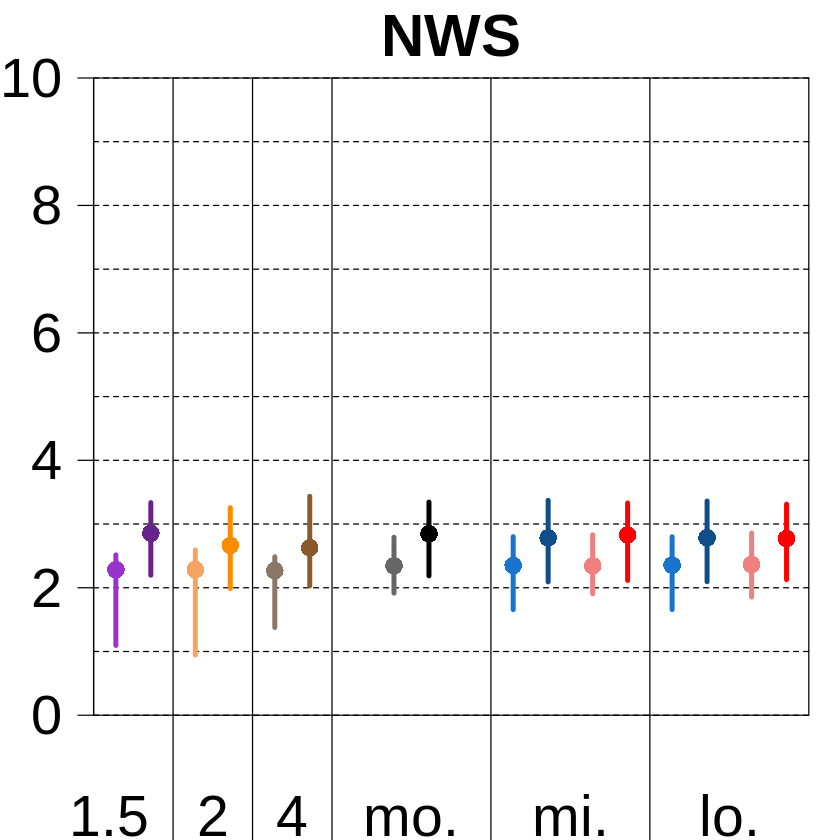

In [25]:

"barplot_satellite_chap12"=function(data, title, ylabel, do_xlab='TRUE', mar=c(4,3,2.5,1)){
    #
    # -- Names
    ensembles = c('CMIP5', 'CMIP6')
    GWLs = c('1.5','2','4')
    scenarios = c('modern', '2.6_mid', '8.5_mid', '2.6_late', '8.5_late')
    nhorizons = length(GWLs)+length(scenarios)
    
    # -- Y limits
    for_ylim = c()
    for (ensemble in ensembles){
        for (horizon in c(GWLs, scenarios)){
            for_ylim = c(for_ylim, data[[ensemble]][[horizon]][['vals']])
        }
    }
    # !!! sqrt!!
    for_ylim = sqrt(for_ylim)
    #for_ylim = log(for_ylim)
    
    # !!!
    ylim = range(for_ylim, na.rm='TRUE')
    print("ylim")
    print(ylim)
    if (is.na(ylim[1])){ylim=c(0,1)}
    if (ylim[1]==0 && ylim[2]==0){ylim=c(0,1)}
    #ylim=c(log(0.000001),log(80))
    ylim=c(0,10^(1/3))
    ylim=c(0,10)
    #ylim=c(0,sqrt(100))
    
    # -- position on the x axis of the ensembles
    xpos = c(1,2,3, 4.5, 6, 7, 8, 9)
    xvert = c(1.5,2.5,3.5,5.5,7.5)
    inner_margin = 0.5
    xlim = c(1-inner_margin, max(xpos)+inner_margin)
    general_cex=1.3
    par(cex=general_cex)
    par(mar=mar)
    plot(1:nhorizons, rep(NA, nhorizons), col='white', ylim=ylim, xlim=xlim,
         xaxt='n', yaxt='n', xlab='', ylab='', xaxs="i", yaxs='i', font=2)
    mtext(ylabel, 2, font=2, line=2.2, cex=general_cex)
    #     cex.axis=1.2, cex.lab=1.5, font=2)
    par(xpd=NA)
    par(font=2)
    
    for (yval in seq(0,10,by=1)){
        lines(xlim,rep(yval,2),type='l', lty=2)
    }

    #for (yval in c(0,1,10)^(1/3)){
    #    lines(xlim,rep(yval,2),type='l', lty=2)
    #}
    #abline(h=c(0,1,10,50,100),lty=2)

    delta = 0.22 # - space between CMIP6/CMIP5/CORDEX
    # -- Plot data
    i = 1
    for (horizon in c(GWLs, scenarios)){
        j = xpos[i] - delta
        for (ensemble in ensembles){
            print(paste(horizon, ensemble))
            dat = data[[ensemble]][[horizon]][['vals']]
            #dat = dat^(1/3)
            #dat = log(dat)
            #dat = c(NA,NA,NA)
            #print(dat)
            if (is.null(dat)){dat = c(NA,NA,NA)}
            col = data[[ensemble]][[horizon]][['color']]
            lines(rep(j,2), c(dat[1],dat[3]), type='l', col=col, lwd=4)
            #print("rep(j,2)")
            #print(rep(j,2))
            #print("c(dat[1],dat[3])")
            #print(c(dat[1],dat[3]))
            points(j, dat[2], cex=1.5, pch=16, col=col)
            j = j + 2*delta
        }
        i = i + 1
    }

    
    
    # -- Y axis
    #yvals = c(0,1,5,10, 20, 50, 100)
    yvals = c(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10)
    dumyvals = (yvals)^(1/3)
    ylabels = c(0,rep(NA,9),1,rep(NA,8),10)
    
    yvals = seq(0,10,by=2)
    dumyvals = yvals
    ylabels = yvals
    par(cex=2.8)
    axis(2, at=dumyvals, labels=ylabels, las=1)
    par(cex=general_cex)
    # -- X axis
    if (do_xlab=='FALSE'){
        axis(1, at=xvert, labels=rep('',length(xvert)))
    }
    # -- Title
    mtext(title,3, font=2, cex=3, line=0.5)
    #mtext("(a)",3, adj=0, cex=1.8, line=0.5)
    # -- Vertical lines
    #for (v in xvert){lines(c(v,v),ylim,type='l', lty=2)}

    bline = ylim[1] - 0.22*(ylim[2]-ylim[1])
    #btext2 = ylim[1] - 0.33*(ylim[2]-ylim[1])
    #
    if (do_xlab=='TRUEE'){
        cex_text = 2.2
        bline = ylim[1] - 0.23*(ylim[2]-ylim[1])
        #btext2 = ylim[1] - 0.33*(ylim[2]-ylim[1])
        #
        # -- Labels GWLs
        GWLs_range = c(0.5,3.2)
        #btext = ylim[1] - 0.29*(ylim[2]-ylim[1])
        btext = ylim[1] - 0.4*(ylim[2]-ylim[1])
        lines(c(-0.1,3.2), c(bline,bline), type='l', lwd=3)
        #text(mean(GWLs_range),btext,expression("GWL ("*~degree~C*")"), font=1, adj=c(0.5,0), cex=cex_text*0.8)
        text(mean(GWLs_range),btext,expression("GWL"), font=1, adj=c(0.5,0), cex=cex_text*0.9)

        #btext2 = ylim[1] - 0.17*(ylim[2]-ylim[1])
        btext2 = ylim[1] - 0.19*(ylim[2]-ylim[1])
        text(0.7,btext2,"1.5", cex=cex_text, font=1, adj=c(0.5,0))
        text(2,btext2,"2", cex=cex_text, font=1, adj=c(0.5,0))
        text(3,btext2,"4", cex=cex_text, font=1, adj=c(0.5,0))

        # -- Labels time slices = modern, mid-term, long-term
        xmodern = 4.5
        xmid = 4.5
        xlate = 6.5
        btext3 = ylim[1] - 0.135*(ylim[2]-ylim[1])
        btext4 = ylim[1] - 0.17*(ylim[2]-ylim[1])
        text(xmid,btext2, "mi.", font=1, cex=cex_text, adj=c(0.5,0))
        text(xlate,btext2, "lo.", font=1, cex=cex_text, adj=c(0.5,0))

        time_slices = c(3.6,7.3)
        lines(time_slices, c(bline,bline), type='l', lwd=3)
        text(mean(time_slices),btext,"Time slices", font=1, adj=c(0.5,0), cex=cex_text*0.9)
    }#end if do_ylab

    # -- X axis
    if (do_xlab=='FALSE'){
        axis(1, at=xvert, labels=rep('',length(xvert)))
    }

    # -- Vertical lines
    vline = ylim
    vline[1] = ylim[1] - (ylim[2]-ylim[1])*0.2
    if (do_xlab=='TRUE'){
        for (v in xvert){lines(c(v,v),vline,type='l', lwd=1)}
    }else{
        for (v in xvert){lines(c(v,v),ylim,type='l')}
    }
    
    if (do_xlab=='TRUE'){
        cex_text = 2.2
        bline = ylim[1] - 0.26*(ylim[2]-ylim[1])
        #bline = ylim[1] - 0.24*(ylim[2]-ylim[1])
        #btext2 = ylim[1] - 0.33*(ylim[2]-ylim[1])
        #
        # -- Labels GWLs
        GWLs_range = c(0.5,3.4)
        #btext = ylim[1] - 0.29*(ylim[2]-ylim[1])
        #btext = ylim[1] - 0.32*(ylim[2]-ylim[1])
        btext = ylim[1] - 0.38*(ylim[2]-ylim[1])
        lines(GWLs_range, c(bline,bline), type='l', lwd=3)
        text(mean(GWLs_range),btext,expression("GWL"), font=1, cex=cex_text)

        #btext2 = ylim[1] - 0.17*(ylim[2]-ylim[1])
        btext2 = ylim[1] - 0.19*(ylim[2]-ylim[1])
        #btext2 = ylim[1] - 0.15*(ylim[2]-ylim[1])
        #cex_text = 1.4
        text(0.7,btext2,"1.5", cex=cex_text, font=1, adj=c(0.5,0))
        text(2,btext2,"2", cex=cex_text, font=1, adj=c(0.5,0))
        text(3,btext2,"4", cex=cex_text, font=1, adj=c(0.5,0))

        # -- Labels time slices = modern, mid-term, long-term
        xmodern = 4.5
        xmid = 6.5
        xlate = 8.5
        #btext3 = ylim[1] - 0.135*(ylim[2]-ylim[1])
        #btext4 = ylim[1] - 0.17*(ylim[2]-ylim[1])
        #text(xmodern,btext2,"mod.", font=2, cex=cex_text)
        #text(xmid,btext2,"mid", font=2, cex=cex_text)
        #text(xlate,btext2,"long", font=2, cex=cex_text)
        text(xmodern,btext2, "mo.", font=1, cex=cex_text, adj=c(0.5,0))
        text(xmid,btext2, "mi.", font=1, cex=cex_text, adj=c(0.5,0))
        text(xlate,btext2, "lo.", font=1, cex=cex_text, adj=c(0.5,0))

        time_slices = c(3.6,9.5)
        lines(time_slices, c(bline,bline), type='l', lwd=3)
        text(mean(time_slices),btext,"Time slices", font=1, cex=cex_text)
    }#end if do_ylab


    
    
    
    
}

#barplot_satellite_chap12(data,"(a) IPCC Region of interest",'Whatever variable (unit)')
barplot_satellite_chap12(all_regions[['NWS']],'NWS', '')

In [29]:
"draw_legend_box_hor"=function(data, mar=c(0,0,3,0)){

    par(mar=mar)
    plot(0:1,0:1,col='white',xaxt='n',yaxt='n', xlab='', ylab='', bty='n')
    text(-0.02,0.85, "Legend", font=2, cex=3, adj=0)
    linewidth = 0.07
    lwd=22
    #xcol1 = 0.25
    #ycol1 = 0.6
    xcol1 = 0.2
    ycol1 = 0.45
    space_between_cols = linewidth*1.4
    space_between_lines = 0.22
    ycol = ycol1
    xensemble = xcol1 - 0.05
    xensemble = xcol1 - 0.05
    cex_text = 2.1
    cex_title = 2.3
    for (ensemble in c('CMIP6','CMIP5')){
        xcol = xcol1
        text(xensemble, ycol, ensemble, font=1, cex=cex_text, adj=1)
        for (GWL in c('1.5','2','4')){
            lines(c(xcol,xcol+linewidth), c(ycol, ycol), type='l', lwd=lwd, col=data[[ensemble]][[GWL]][['color']])
            if (ensemble=='CMIP6'){
                if (GWL=='1.5'){ tmplab = expression('+1.5'*degree*C) }
                if (GWL=='2'){ tmplab = expression('+2'*degree*C) }
                if (GWL=='4'){ tmplab = expression('+4'*degree*C) }
                text(mean(c(xcol,xcol+linewidth)), ycol1+space_between_lines, tmplab, font=2, cex=cex_text)
                if (GWL=='1.5'){
                    #text(mean(c(xcol,xcol+linewidth)), ycol1+0.1, 'GWL', font=2, cex=1.5)
                    text(xcol, ycol1+space_between_lines*2, 'GWL', font=2, cex=cex_title, adj=0)
                }
            }
            xcol = xcol + space_between_cols
        }
        ycol = ycol - space_between_lines
    }

    #xcol1 = 0.45
    xcol1 = 0.55
    #space_between_cols = linewidth*1.6
    ycol = ycol1
    xensemble = xcol1 - 0.05
    xensemble = xcol1 - 0.05
    for (ensemble in c('CMIP6','CMIP5')){
        xcol = xcol1
        #text(xensemble, ycol, ensemble, font=2, cex=cex_text, adj=1)
        for (time_slice in c('modern','2.6_late','8.5_late')){
            if (time_slice=='modern'){ tmplab = 'modern' }
            if (time_slice=='2.6_late'){ tmplab = '2.6' }
            if (time_slice=='8.5_late'){ tmplab = '8.5' }
            lines(c(xcol,xcol+linewidth), c(ycol, ycol), type='l', lwd=lwd, col=data[[ensemble]][[time_slice]][['color']])
            if (ensemble=='CMIP6'){
                text(mean(c(xcol,xcol+linewidth)), ycol1+space_between_lines, tmplab, font=1, cex=cex_text)
            }
            if (time_slice=='modern'){
                #text(mean(c(xcol,xcol+linewidth)), ycol1+0.1, 'GWL', font=2, cex=1.5)
                text(xcol, ycol1+space_between_lines*2, 'RCPs/SSPs', font=2, cex=cex_title, adj=0)
            }
            xcol = xcol + space_between_cols
        }
        ycol = ycol - space_between_lines
    }
        ycol = ycol - space_between_lines
    
    yline = 0.5
    ypos = 0.45
    ylen = 0.3
    #xx = 0.75
    xx = 0.9
    lines(c(xx,xx),c(ypos-ylen,ypos+ylen), type='l', lwd=lwd/3, col='black')
    points(xx,ypos, pch=16, cex=2.6)
    text(xx+0.02,ypos+(ylen*1.1), "P90", font=1, cex=cex_text,adj=0)
    text(xx+0.02,ypos-(ylen*1.1), "P10", font=1, cex=cex_text,adj=0)
    text(xx+0.02,ypos, "median", font=1, cex=cex_text, adj=0)
    
}
#draw_legend_box_vert(data)

[1] "ylim"
[1] 1.778512 2.207191
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "ylim"
[1] 1.974078 2.321036
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "ylim"
[1] 2.091069 2.550664
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "ylim"
[1] 1.895876 2.28349

[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "ylim"
[1] 1.481968 2.040241
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "ylim"
[1] 1.024319 1.545204
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "ylim"
[1] 1.564382 2.004921
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"

png 
  2

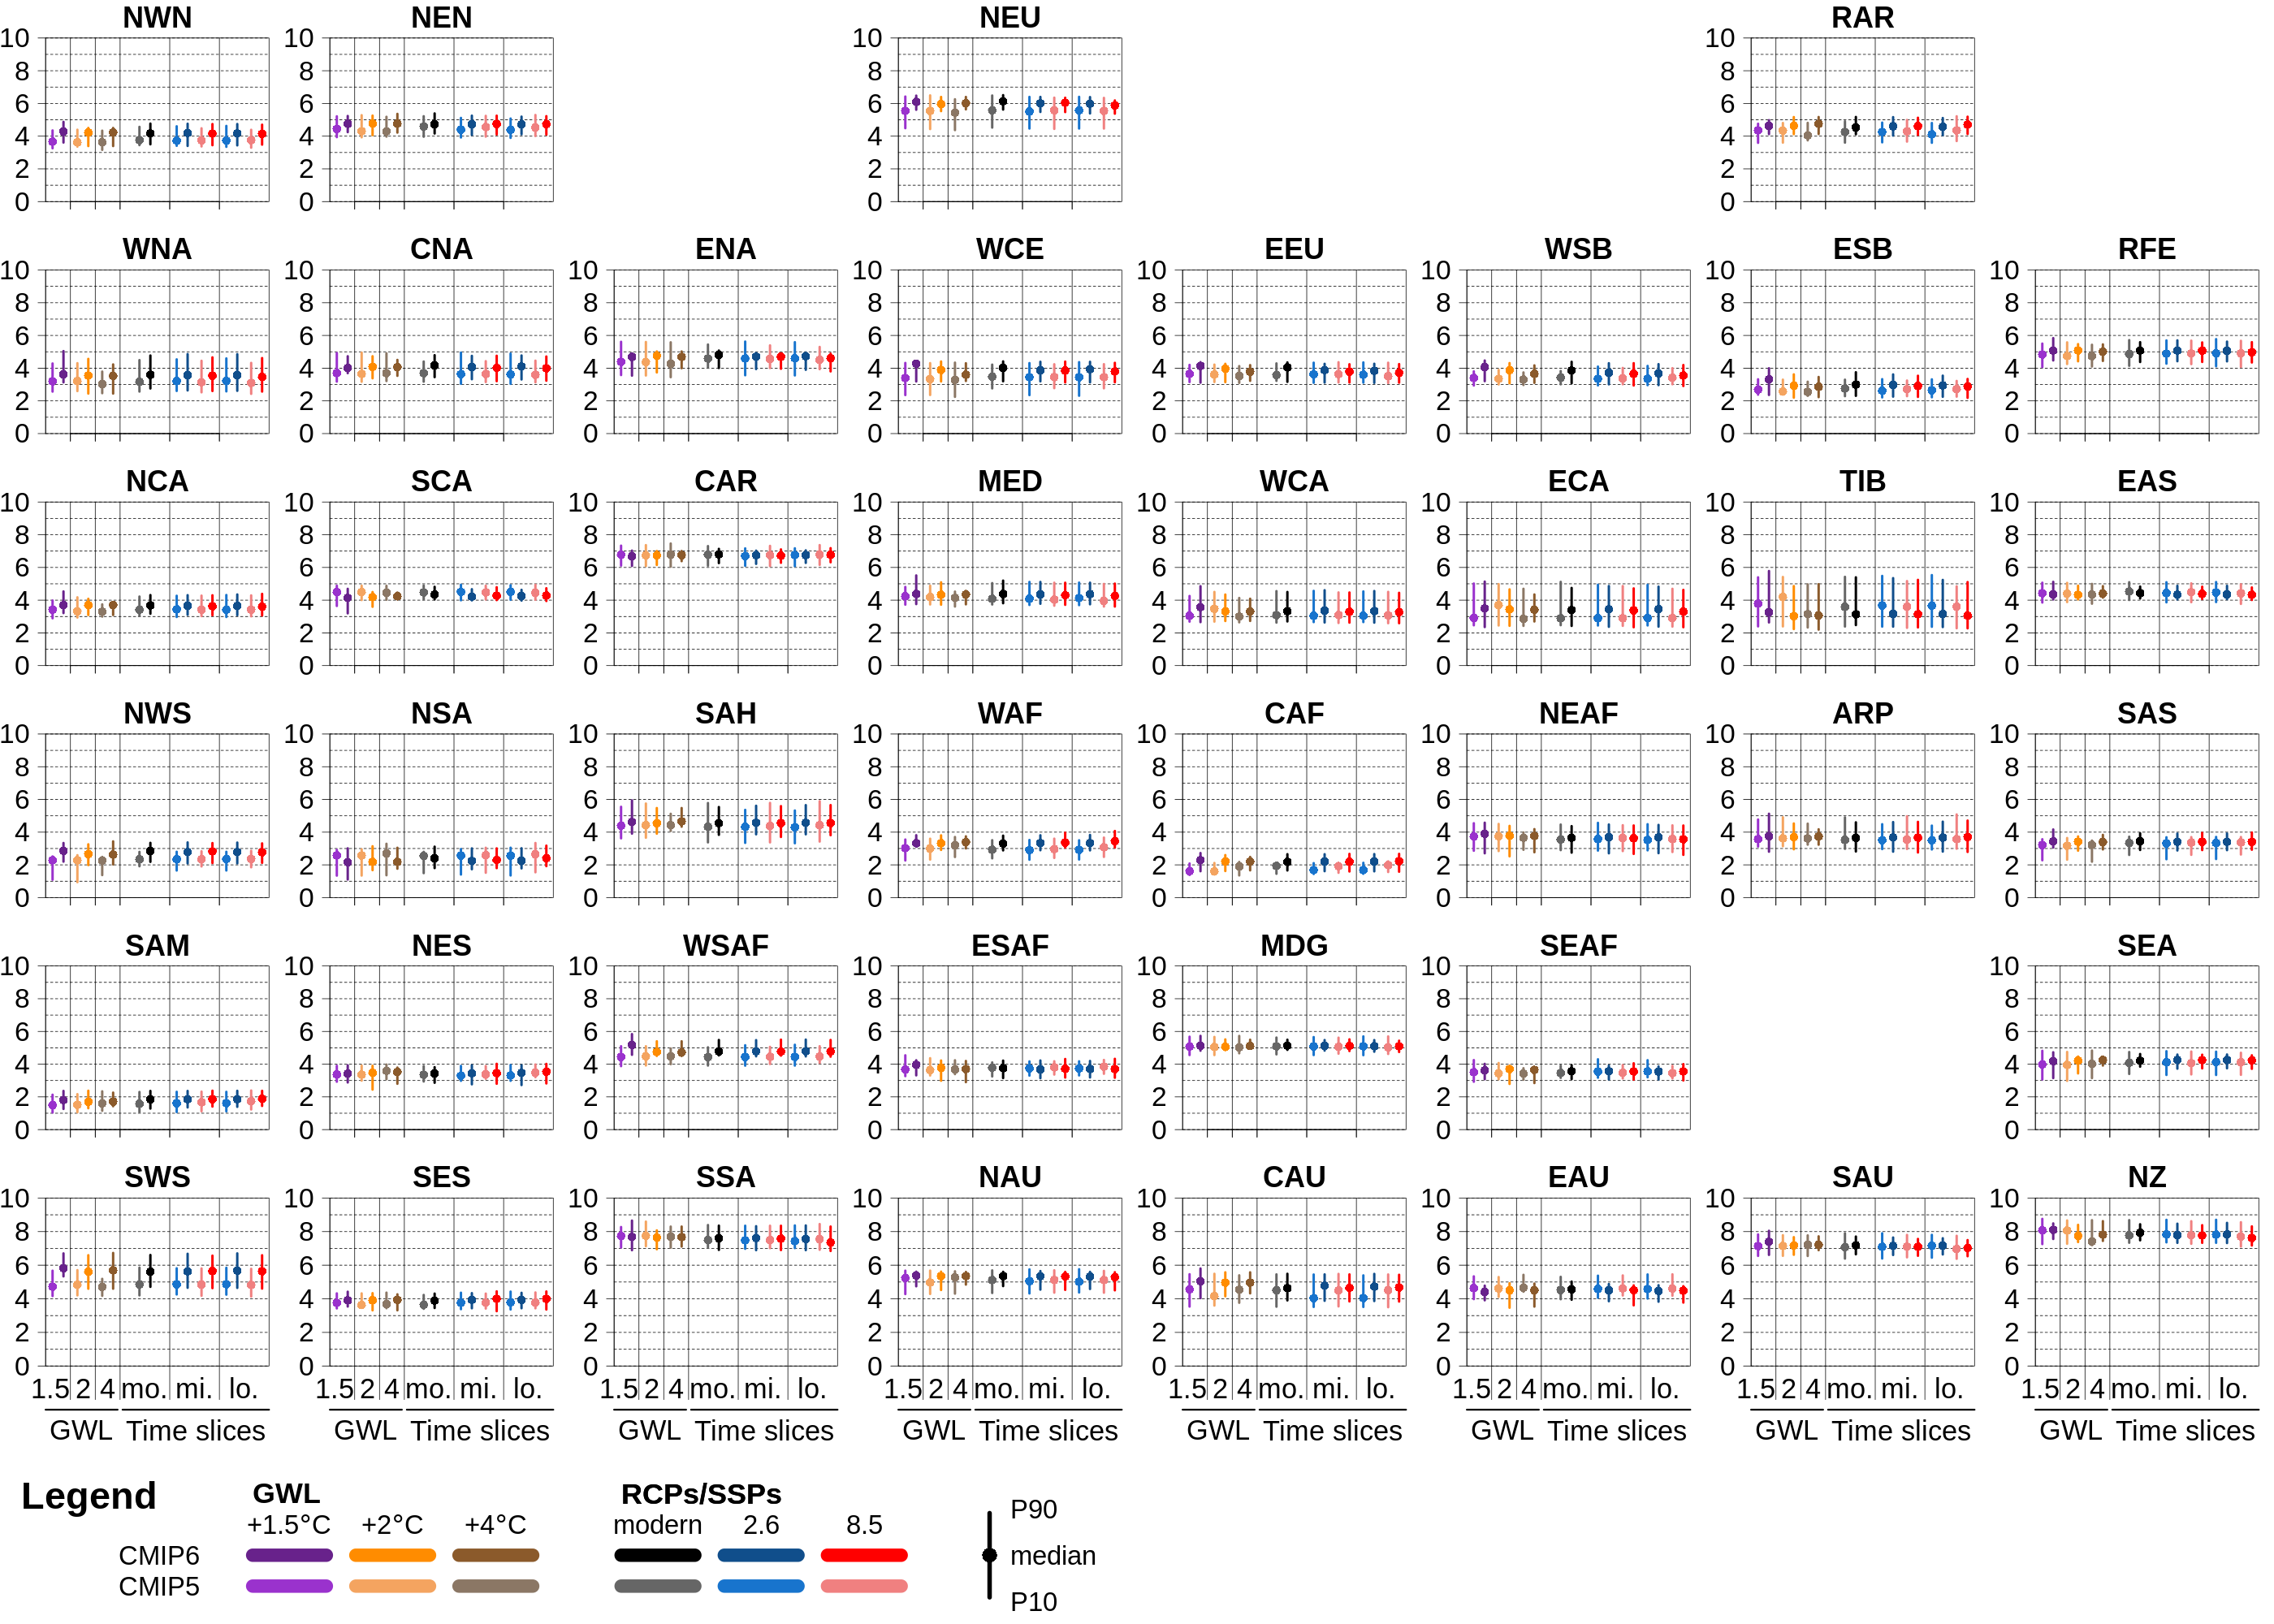

In [30]:
#3 lines
#4 columns
#legend is the last
fsize = 2000
outfilename = paste('~/Chapter12_IPCC/figs/Satellite_barplots/wind_satellite.png',sep='')
png(outfilename, width=fsize*1.4,height=fsize)

#NWN, NEN  NA  # NEU,  NA   NA,  RAR, NA  #
#WNA, CNA, ENA  # WCE, EEU, WSB, ESB, RFE  #
#NCA, SCA, CAR  # MED, WCA, ECA, TIB, EAS  #
#NWS, NSA # SAH,  WAF, CAF, NEAF, ARP, SAS  #
#SAM, NES # WSAF, ESAF, MDG, SEAF, NA, SEA 
#SWS, SES, SSA  # NAU, CAU, EAU, SAU, NZ  #
# Colorbar
mat = rbind(
    c(1, 2, 0, 3, 0, 0, 4, 0),
    c(5, 6, 7, 8, 9, 10,11,12),
    c(13,14,15,16,17,18,19,20),
    c(21,22,23,24,25,26,27,28),
    c(29,30,31,32,33,34,0, 35),
    c(36,37,38,39,40,41,42,43),
    c(44, 44,44,44,0,0 ,0, 0 )
)

AR6_regions = c('NWN', 'NEN', 'NEU', 'RAR',
'WNA', 'CNA', 'ENA', 'WCE', 'EEU', 'WSB', 'ESB', 'RFE',
'NCA', 'SCA', 'CAR', 'MED', 'WCA', 'ECA', 'TIB', 'EAS',
'NWS', 'NSA', 'SAH', 'WAF', 'CAF', 'NEAF', 'ARP', 'SAS',
'SAM', 'NES', 'WSAF', 'ESAF', 'MDG', 'SEAF', 'SEA', 
'SWS', 'SES', 'SSA', 'NAU', 'CAU', 'EAU', 'SAU', 'NZ')

layout(mat,height=c(2,2,2,2,2,2.3,1.7))


ylab = 'Whatever variable (unit)'
ylab = ''
for (i in 1:length(AR6_regions)){
    region_name = AR6_regions[i]
    plot_title = region_name
    #print(region_name)
    if (region_name %in% c('SWS', 'SES', 'SSA', 'NAU', 'CAU', 'EAU', 'SAU', 'NZ')){
        do_xlab='TRUE'
        mar=c(4,3,2.5,1)
    }else{
        do_xlab='FALSE'
        mar=c(2,3,2.5,1)
    }
    barplot_satellite_chap12(all_regions[[region_name]],plot_title, ylab, do_xlab=do_xlab, mar=mar)
}
draw_legend_box_hor(all_regions[[region_name]])
dev.off()

library("IRdisplay")
display_png(file=outfilename)  

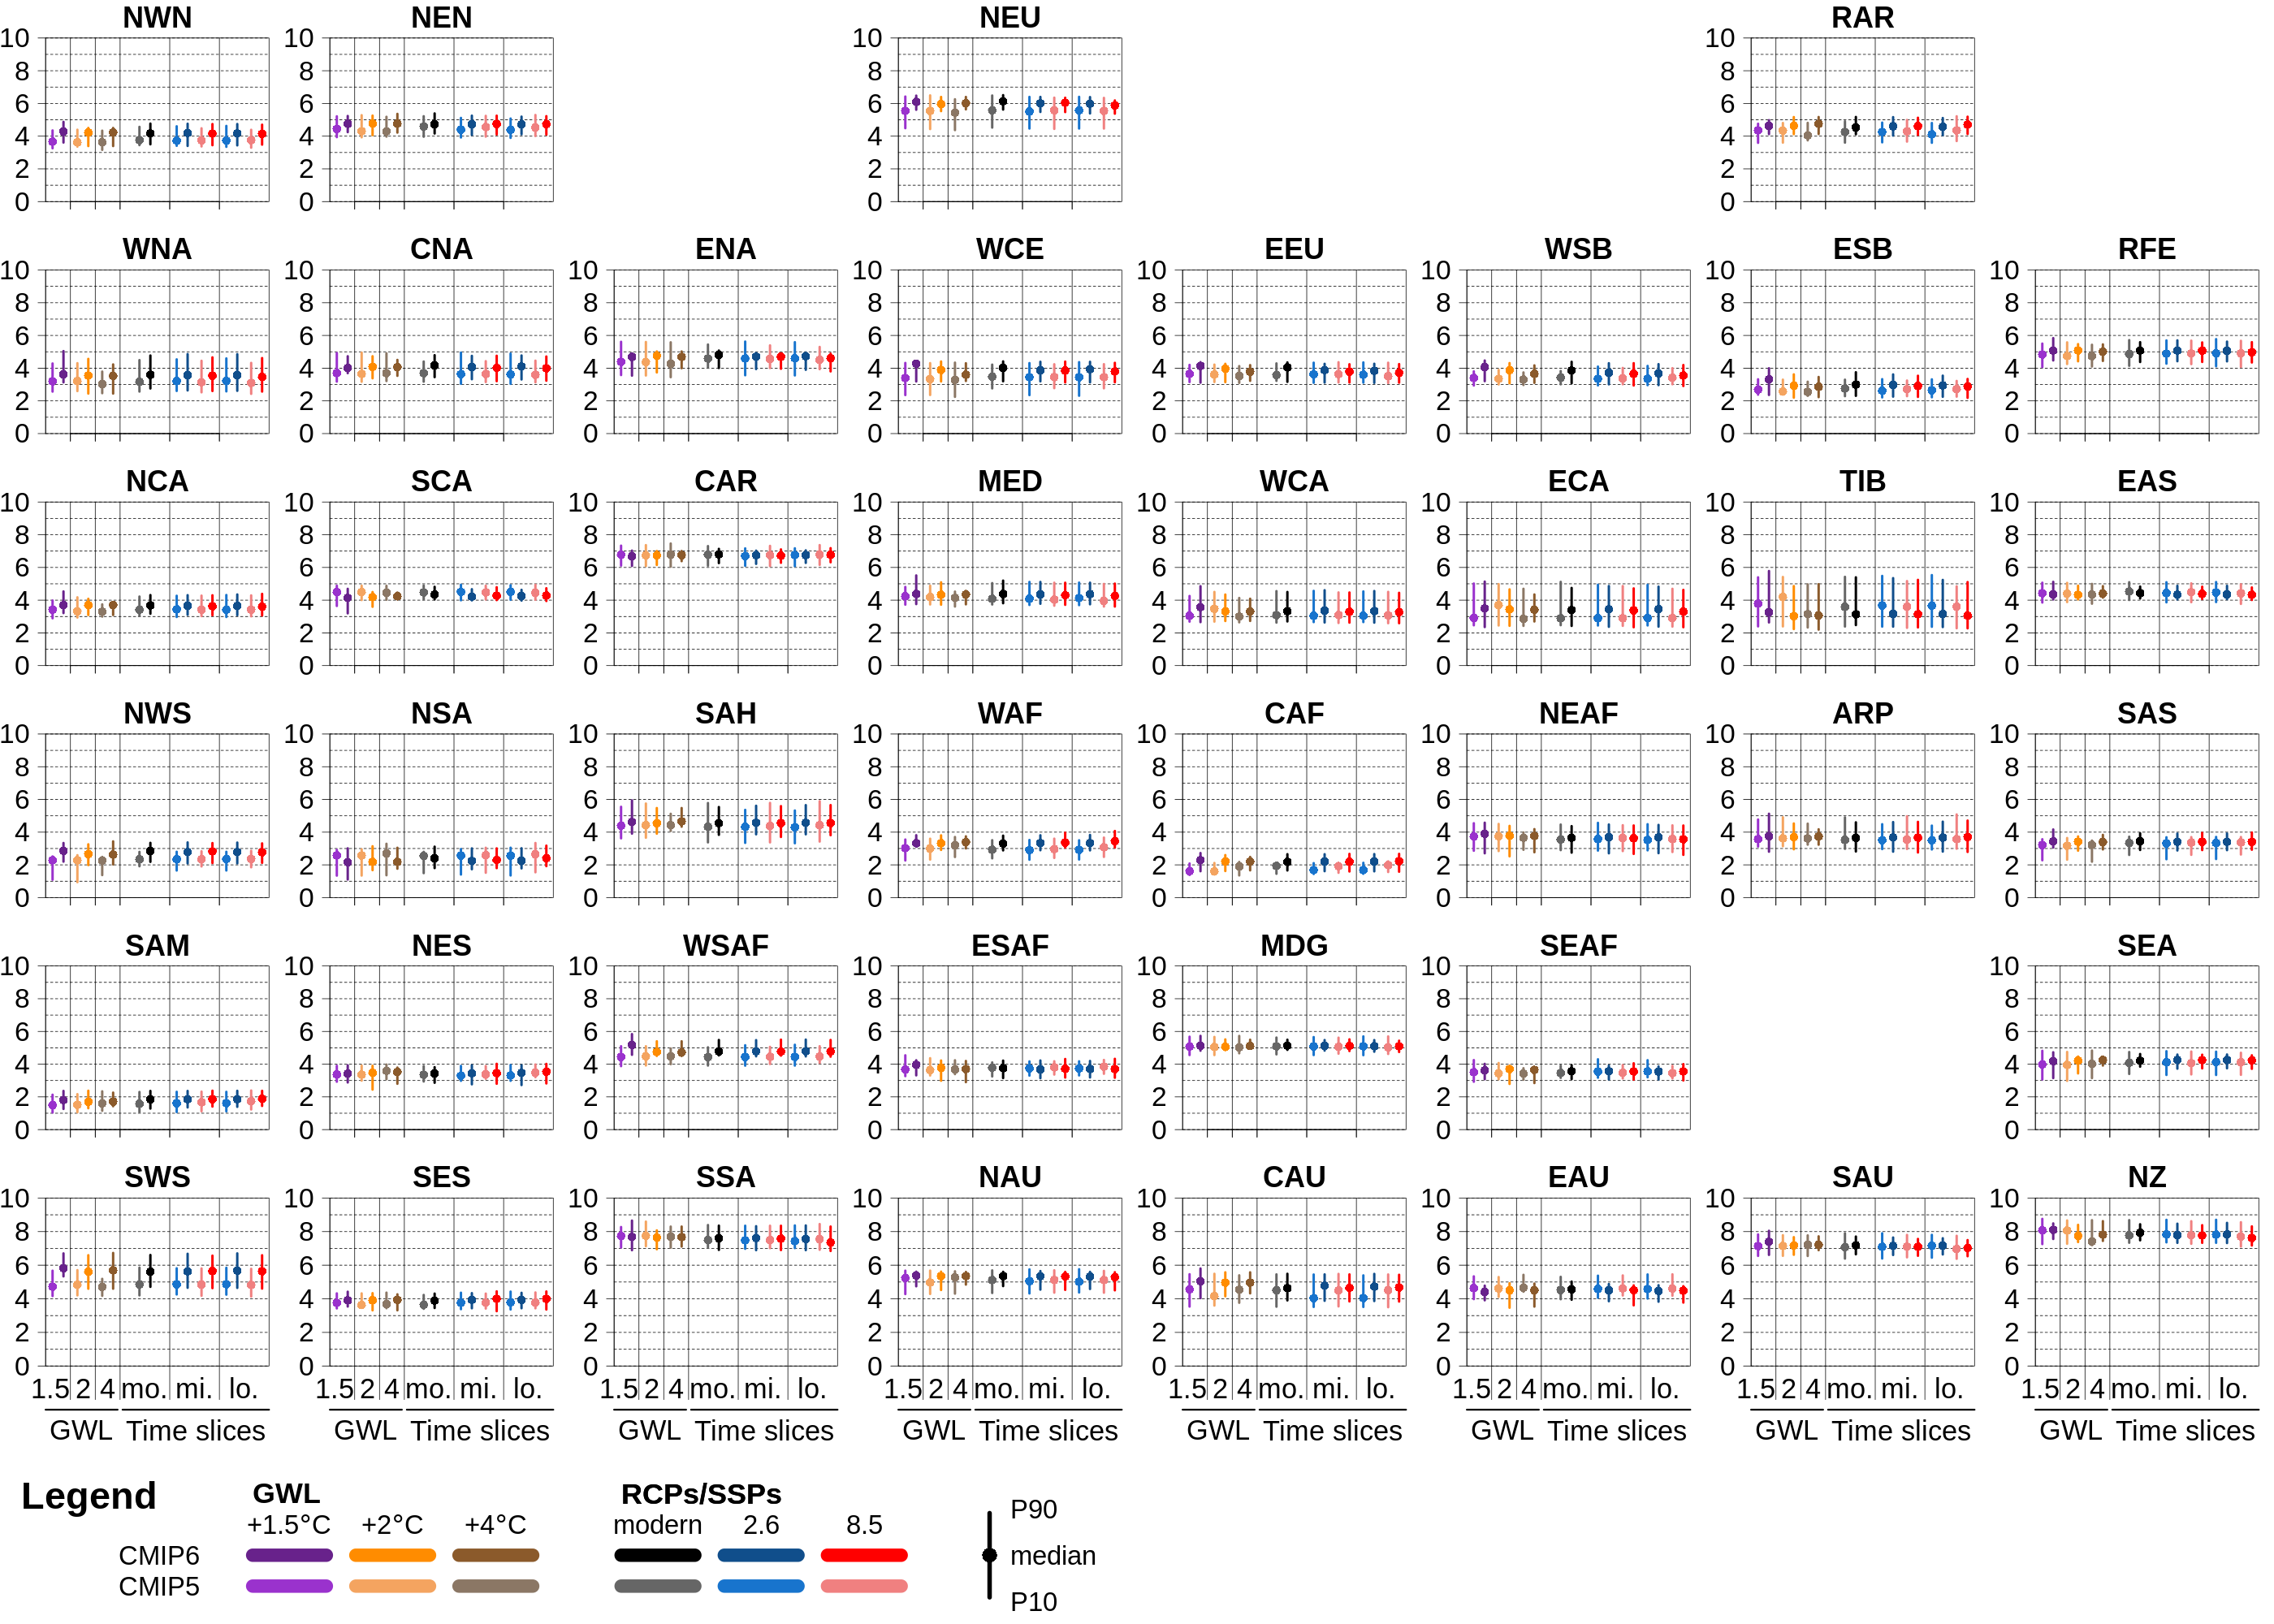

In [31]:
library("IRdisplay")
display_png(file=outfilename)  